In [1]:
using Plots

Modèle SIR \
Paramètres de l'épidémie :

In [2]:
β = 1
γ = 0.25
pas_tps = 0.1
tps = 40

40

Conditions initiales :

In [3]:
S = 99
I = 1
R = 0

0

Fonction équation différentielle ($X' (t) = f(X(t))$) :

In [4]:
function f(U, β, γ, N)
    dUdt = [- β*U[2]*U[1]/N, β*U[2]*U[1]/N - γ*U[2], γ*U[2]]
    return dUdt
end

f (generic function with 1 method)

Euler explicite et affichage :

In [21]:
function epidemie(S, I, R, β, γ, pas_tps, tps)

    Susceptible = Float64[S]
    Infectious = Float64[I]
    Recovered = Float64[R]

    N = S + I + R
    U = Float64[S, I, R]

    for t in range(pas_tps, tps, length = Int(tps/pas_tps))
        dUdt = f(U, β, γ, N)

        U += dUdt * pas_tps

        append!(Susceptible, U[1])
        append!(Infectious, U[2])
        append!(Recovered, U[3])
    end

    T = range(0, tps, length = Int(tps/pas_tps)+1)

    p = plot(T, Susceptible, color="#4a4c4d", linewidth=2.0, linestyle=:solid, label="Susceptible")
    plot!(p, T, Infectious, color="#c13607", linewidth=2.0, linestyle=:solid, label="Infectious")
    plot!(p, T, Recovered, color="#3c9f66", linewidth=2.0, linestyle=:solid, label="Recovered")
end

epidemie (generic function with 1 method)

On lance le programme :

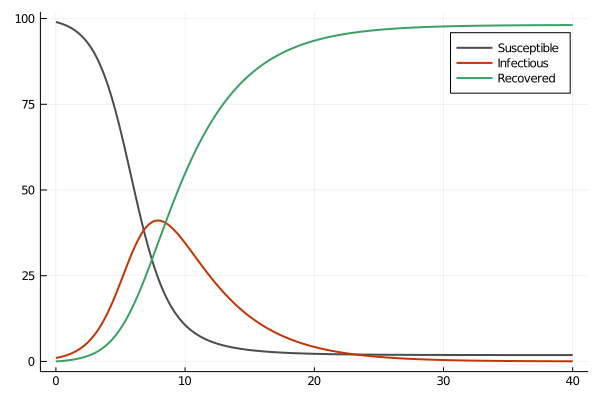

In [22]:
epidemie(S, I, R, β, γ, pas_tps, tps)

On s'amuse à faire varier les paramètres :

┌ Info: Saved animation to 
│   fn = /home/pglandon/Ponts/Projet-de-Pratique-du-Calcul-Scientifique/anim.gif
└ @ Plots /home/pglandon/.julia/packages/Plots/XJg0n/src/animation.jl:102


Plots.AnimatedGif("/home/pglandon/Ponts/Projet-de-Pratique-du-Calcul-Scientifique/anim.gif")
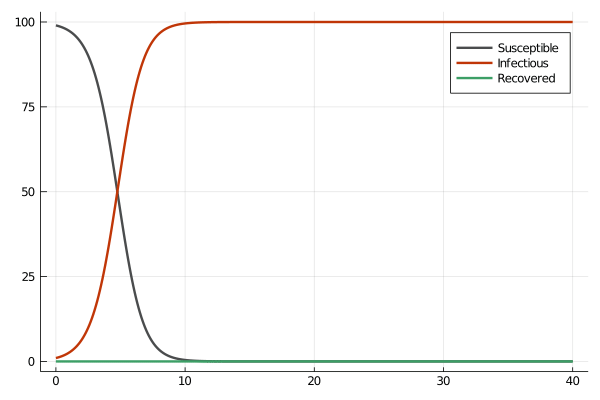

In [23]:
γ_range = range(0, 1, length=100)

anim = @animate for γ in γ_range
    epidemie(S, I, R, β, γ, pas_tps, tps)
end
gif(anim, "anim.gif", fps = 15)